# Lumped Gearbox Model - Example Notebook 1

This notebook contains examples of the application of the lumped_gearbox_models module.

The gear mesh stiffness and gearbox modelling code was written by Luke van Eyk.

In [1]:
import importlib
try:
    import lumped_gearbox_models.gearbox_dynamic_solvers as gdsolve
except:
    from gbmodels.lumped_gearbox_models import gearbox_dynamic_solvers as gdsolve
importlib.reload(gdsolve)
import numpy as np
import matplotlib.pyplot as plt

## Creating the motor torque function:

In [2]:
def motor_torque_function(speed_rpm):
    Tf = 10 # [Nm] - Full Load
    Ts = 2.7*Tf #27 # [Nm] - Starting
    Tb = 3.2*Tf #32 # [Nm] - Breakdown

    Po = 1500 # [W] - Rated Power
    ws = 1500 # [rpm] - Synchronous Speed
    gb = 0.315 # [-] - Slip
    ca1 = 1.711 # [-] - Motor Constant
    ca2 = 1.316 # [-] - Motor Constant    

    return gdsolve.torque_motor_chaari(Tb, gb, speed_rpm, ws, ca1, ca2)

## Gearbox Models:
Initialise the gearbox classes:

In [3]:
# This is one gearbox model
gb_mod = gdsolve.GearboxModel_Chaari_8DOF()

# This is another gearbox model
gb_mod2 = gdsolve.GearboxModel_Luo_10DOF()

In [4]:
help(gb_mod)

Help on GearboxModel_Chaari_8DOF in module lumped_gearbox_models.gearbox_dynamic_solvers object:

class GearboxModel_Chaari_8DOF(GearboxModelUtils)
 |  _summary_
 |  
 |  Parameters
 |  ----------------
 |      GearboxModelUtils (_type_): _description_
 |  
 |  Method resolution order:
 |      GearboxModel_Chaari_8DOF
 |      GearboxModelUtils
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  dof_info(self)
 |  
 |  get_damping_matrix_static(self)
 |      The damping matrix is defined by C(t) = Cs + cgm * S, where this matrix is Cs.
 |  
 |  get_mass_matrix(self)
 |  
 |  get_motor_speedradps(self, velocity_response_vector)
 |      Get the DOF that is associated with the motor. This is used in the Newmark integration function.
 |  
 |  get_parameter_dict_default(self)
 |      The purpose of this function is two-fold. 
 |      Firstly, create a dictionary with all the essential p

In [5]:
gb_mod.dof_info()

This function provides information behind the physical meaning of the DOFs:
            0: X Vibration (Pinion Bearing)
            1: Y Vibration (Pinion Bearing)
            2: Motor Rotation
            3: Pinion Rotation
            4: X Vibration (Driven Bearing)
            5: Y vibration (Driven Bearing)
            6: Driven Gear Rotation
            7: Load Rotation
           


'This function provides information behind the physical meaning of the DOFs:\n            0: X Vibration (Pinion Bearing)\n            1: Y Vibration (Pinion Bearing)\n            2: Motor Rotation\n            3: Pinion Rotation\n            4: X Vibration (Driven Bearing)\n            5: Y vibration (Driven Bearing)\n            6: Driven Gear Rotation\n            7: Load Rotation\n           '

In [6]:
gb_mod2.dof_info()

This function provides information behind the physical meaning of the DOFs:
            0: X Vibration (Pinion Bearing)
            1: Y Vibration (Pinion Bearing)
            2: Motor Rotation
            3: Pinion Rotation
            4: X Vibration (Driven Bearing)
            5: Y vibration (Driven Bearing)
            6: Driven Gear Rotation
            7: Load Rotation
            8: X Vibration (Gearbox Casing)
            9: Y Vibration (Gearbox Casing)
           


'This function provides information behind the physical meaning of the DOFs:\n            0: X Vibration (Pinion Bearing)\n            1: Y Vibration (Pinion Bearing)\n            2: Motor Rotation\n            3: Pinion Rotation\n            4: X Vibration (Driven Bearing)\n            5: Y vibration (Driven Bearing)\n            6: Driven Gear Rotation\n            7: Load Rotation\n            8: X Vibration (Gearbox Casing)\n            9: Y Vibration (Gearbox Casing)\n           '

We can find the default parameters from the dictionary:

In [7]:
# Obtain the default parameters:
parmdict = gb_mod.get_parameter_dict_default()

In [8]:
# These are the default parameters:
parmdict

{'m1': 1.8,
 'm2': 2.5,
 'mp': 0.6,
 'mg': 1.5,
 'I11': 0.0043,
 'I12': 0.00027,
 'I21': 0.0027,
 'I22': 0.0045,
 'E': 206800000000.0,
 'nu': 0.33,
 'rho': 7800,
 'a0': 0.3490658503988659,
 'Z1': 20,
 'Z2': 40,
 'L1': 0.023,
 'L2': 0.023,
 'mod1': 0.003,
 'mod2': 0.003,
 'Ra': 0.004888,
 'kx1': 100000000,
 'ky1': 100000000,
 'kx2': 100000000,
 'ky2': 100000000,
 'ktheta1': 100000,
 'ktheta2': 100000,
 'cx1': 0,
 'cy1': 0,
 'cx2': 0,
 'cy2': 0,
 'ctheta1': 0,
 'ctheta2': 0,
 'Zeta': 0.07}

In [9]:
# These are the default parameters:
gb_mod2.get_parameter_dict_default()

{'m1': 1.2728,
 'm2': 3.5367,
 'mp': None,
 'mg': None,
 'mf': 18.509,
 'I11': 0.016107,
 'I12': 0.0001751,
 'I21': 0.006828,
 'I22': 0.005153,
 'E': 206800000000.0,
 'nu': 0.3,
 'rho': 7800,
 'a0': 0.3490658503988659,
 'Z1': 16,
 'Z2': 48,
 'L1': 0.016,
 'L2': 0.016,
 'mod1': 0.003175,
 'mod2': 0.003175,
 'Ra': 0.00976,
 'kx1': 85364000.0,
 'ky1': 85364000.0,
 'kx2': 85364000.0,
 'ky2': 85364000.0,
 'kfx': 199120000.0,
 'kfy': 203600000.0,
 'ktheta1': 330,
 'ktheta2': 330,
 'cx1': 21340.0,
 'cy1': 21340.0,
 'cx2': 21340.0,
 'cy2': 21340.0,
 'cfx': 1995.56,
 'cfy': 2005.8,
 'ctheta1': 23.1,
 'ctheta2': 23.1,
 'Zeta': 0.07}

## Changing the parameters of the model

We can update the whole dictionary:

In [10]:
# Set the default values as inputs:
gb_mod.set_parameter_dict(**parmdict)
# Get the updated dictionary
gb_mod.get_parameters_dict()

{'m1': 1.8,
 'm2': 2.5,
 'mp': 0.6,
 'mg': 1.5,
 'I11': 0.0043,
 'I12': 0.00027,
 'I21': 0.0027,
 'I22': 0.0045,
 'E': 206800000000.0,
 'nu': 0.33,
 'rho': 7800,
 'a0': 0.3490658503988659,
 'Z1': 20,
 'Z2': 40,
 'L1': 0.023,
 'L2': 0.023,
 'mod1': 0.003,
 'mod2': 0.003,
 'Ra': 0.004888,
 'kx1': 100000000,
 'ky1': 100000000,
 'kx2': 100000000,
 'ky2': 100000000,
 'ktheta1': 100000,
 'ktheta2': 100000,
 'cx1': 0,
 'cy1': 0,
 'cx2': 0,
 'cy2': 0,
 'ctheta1': 0,
 'ctheta2': 0,
 'Zeta': 0.07,
 'Rb1': 0.028190778623577252,
 'Rr1': 0.02625,
 'Rb2': 0.056381557247154504,
 'Rr2': 0.056249999999999994,
 'Td': 0.19954955568194027,
 'Ts': 0.11460970967703904,
 'Tlarge': 0.5137088210409195,
 'a1': 0.5150736228946504,
 'a2': 0.09344420020708127,
 'a3': 0.10037542908138963,
 'd1': 0.0019499161355677158,
 'Rp1': None,
 'Rp2': None}

We can update a subset of the keys like this:

In [11]:
gb_mod.set_parameter_dict(m1 = 2)
gb_mod.get_parameters_dict()

{'m1': 2,
 'm2': 2.5,
 'mp': 0.6,
 'mg': 1.5,
 'I11': 0.0043,
 'I12': 0.00027,
 'I21': 0.0027,
 'I22': 0.0045,
 'E': 206800000000.0,
 'nu': 0.33,
 'rho': 7800,
 'a0': 0.3490658503988659,
 'Z1': 20,
 'Z2': 40,
 'L1': 0.023,
 'L2': 0.023,
 'mod1': 0.003,
 'mod2': 0.003,
 'Ra': 0.004888,
 'kx1': 100000000,
 'ky1': 100000000,
 'kx2': 100000000,
 'ky2': 100000000,
 'ktheta1': 100000,
 'ktheta2': 100000,
 'cx1': 0,
 'cy1': 0,
 'cx2': 0,
 'cy2': 0,
 'ctheta1': 0,
 'ctheta2': 0,
 'Zeta': 0.07,
 'Rb1': 0.028190778623577252,
 'Rr1': 0.02625,
 'Rb2': 0.056381557247154504,
 'Rr2': 0.056249999999999994,
 'Td': 0.19954955568194027,
 'Ts': 0.11460970967703904,
 'Tlarge': 0.5137088210409195,
 'a1': 0.5150736228946504,
 'a2': 0.09344420020708127,
 'a3': 0.10037542908138963,
 'd1': 0.0019499161355677158,
 'Rp1': None,
 'Rp2': None}

We can update additional keys (note that both the new changes and the old changes should reflect in the dictionary)

In [12]:
gb_mod.set_parameter_dict(mg = 3)
gb_mod.get_parameters_dict()

{'m1': 2,
 'm2': 2.5,
 'mp': 0.6,
 'mg': 3,
 'I11': 0.0043,
 'I12': 0.00027,
 'I21': 0.0027,
 'I22': 0.0045,
 'E': 206800000000.0,
 'nu': 0.33,
 'rho': 7800,
 'a0': 0.3490658503988659,
 'Z1': 20,
 'Z2': 40,
 'L1': 0.023,
 'L2': 0.023,
 'mod1': 0.003,
 'mod2': 0.003,
 'Ra': 0.004888,
 'kx1': 100000000,
 'ky1': 100000000,
 'kx2': 100000000,
 'ky2': 100000000,
 'ktheta1': 100000,
 'ktheta2': 100000,
 'cx1': 0,
 'cy1': 0,
 'cx2': 0,
 'cy2': 0,
 'ctheta1': 0,
 'ctheta2': 0,
 'Zeta': 0.07,
 'Rb1': 0.028190778623577252,
 'Rr1': 0.02625,
 'Rb2': 0.056381557247154504,
 'Rr2': 0.056249999999999994,
 'Td': 0.19954955568194027,
 'Ts': 0.11460970967703904,
 'Tlarge': 0.5137088210409195,
 'a1': 0.5150736228946504,
 'a2': 0.09344420020708127,
 'a3': 0.10037542908138963,
 'd1': 0.0019499161355677158,
 'Rp1': None,
 'Rp2': None}

## Gear Stiffness Models:

The gear stiffness models derive its parameters from the gearbox model, therefore, the gearbox model is given as an input.

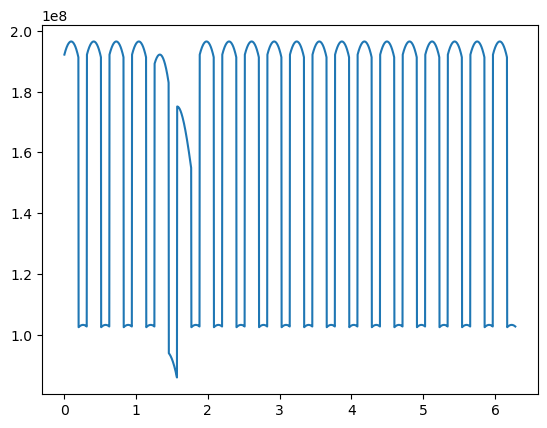

In [13]:
# This is the gear mesh stiffness of a cracked model:
gms_c = gdsolve.GearStiffness_CrackSingle(gb_mod.parms,
                               fraction_crack_height_leftside = 0.5,
                               fraction_crack_height_rightside = 0.5,
                               fraction_crack_width=0.0)

gms_c.plot_gear_mesh_stiffness(1)

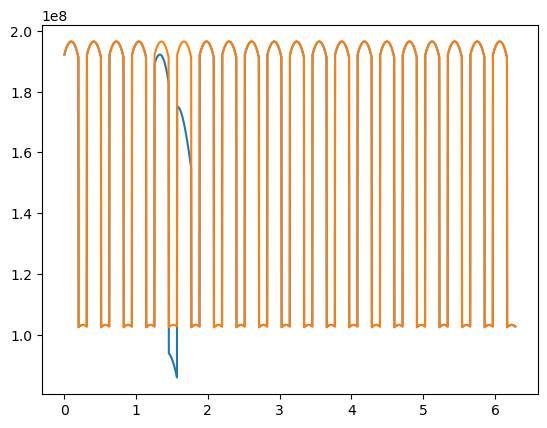

In [14]:
# This is the gear mesh stiffness of a healthy model:
gms_h = gdsolve.GearStiffness_Healthy(gb_mod.parms)

gms_c.plot_gear_mesh_stiffness(1)
gms_h.plot_gear_mesh_stiffness(1)

## Gear Mesh Stiffness - Damaged models

Crack damage properties {'fault_area': 6.856660012767476e-05, 'full_area': 0.00012099990794589704, 'fault_area_ratio': 0.5666665478649215}
Chip damage properties {'fault_area': 7.549889109738722e-05, 'full_area': 0.00011306226195817139, 'fault_area_ratio': 0.6677638478993004}
Spall damage properties {'fault_area': 7.105964988430296e-05, 'full_area': 0.00011306226195817139, 'fault_area_ratio': 0.6285001613588117}
Pit damage properties {'fault_area': 6.185395715580008e-06, 'full_area': 0.00011306226195817139, 'fault_area_ratio': 0.054707871649236614}
Pit damage properties {'fault_area': 6.185395715580008e-06, 'full_area': 0.00011306226195817139, 'fault_area_ratio': 0.054707871649236614}


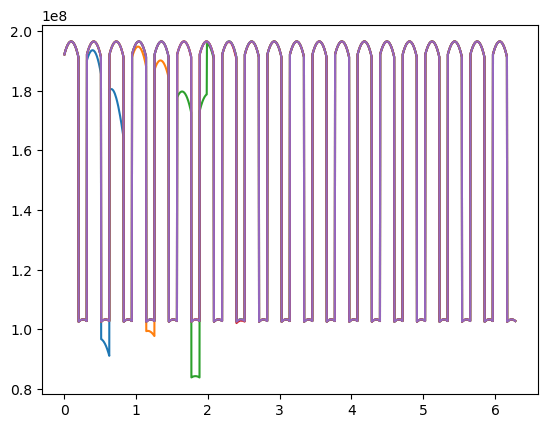

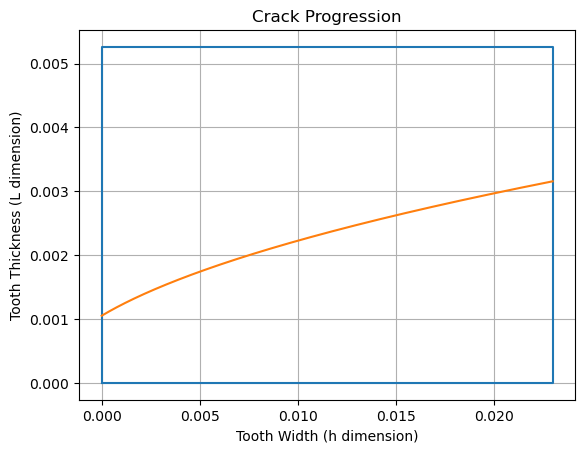

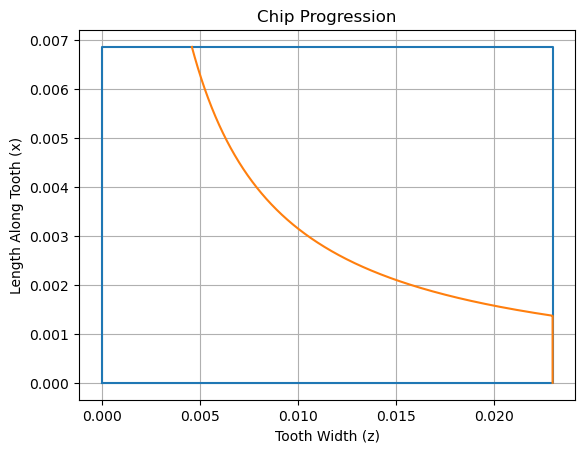

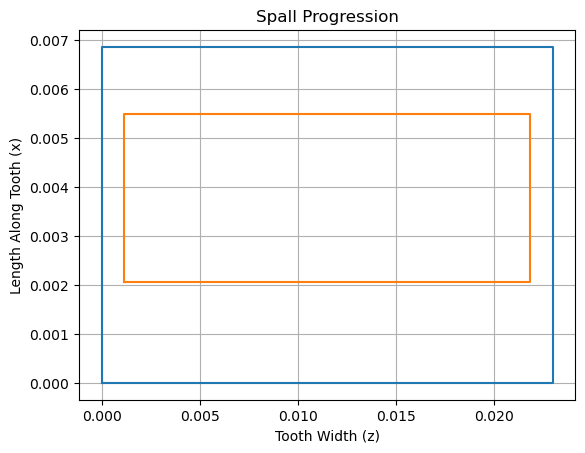

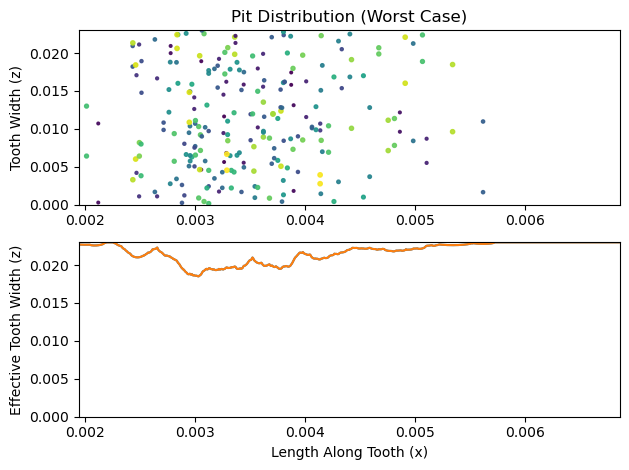

In [15]:


# This is the gear mesh stiffness of a cracked model:
gms_crack = gdsolve.GearStiffness_CrackSingle(gb_mod.parms,
                            fraction_crack_height_leftside = 0.2,
                            fraction_crack_height_rightside = 0.6,
                            fraction_crack_width=0.0,
                                    fault_tooth_number = 2)


gms_chip = gdsolve.GearStiffness_ChipSingle(gb_mod.parms,
                            fraction_chip_width_along_L = 0.8,
                            fraction_chip_depth_along_x = 0.8,
                                fault_tooth_number = 4)

gms_spall = gdsolve.GearStiffness_SpallSingle(gb_mod.parms,
                                    fraction_spall_start=0.8,
                                    fraction_spall_length=0.5,
                                    fraction_spall_width=0.9,
                                    fraction_spall_depth=0.3,
                                    fault_tooth_number = 6)


gms_pit = gdsolve.GearStiffness_PitSingle(gb_mod.parms,
                                lower_pit_angle_rad=np.pi/6,
                                upper_pit_angle_rad=np.pi/5,
                                lower_pit_radius_frac= 0.005,
                                upper_pit_radius_frac= 0.015,
                                mean_pit_location_frac= 0.5,
                                std_pit_location_frac= 0.1,
                                num_pits= 120,
                                    fault_tooth_number = 8)

# *** IMPORTANT!!!!! We need to incorporate a check to ensure the start value is always larger then the length value, otherwise this does not work correctly.
gms_crack.plot_gear_mesh_stiffness(1)
gms_chip.plot_gear_mesh_stiffness(1)
gms_spall.plot_gear_mesh_stiffness(1)
gms_pit.plot_gear_mesh_stiffness(1)

# This is the gear mesh stiffness of a healthy model:
gms_h = gdsolve.GearStiffness_Healthy(gb_mod.parms)
gms_h.plot_gear_mesh_stiffness(1)

print('Crack damage properties',gms_crack.get_damage_size())
gms_crack.plot_gear_cross_section(2)

print('Chip damage properties',gms_chip.get_damage_size())
gms_chip.plot_gear_cross_section(3)

print('Spall damage properties',gms_spall.get_damage_size())
gms_spall.plot_gear_cross_section(4)

print('Pit damage properties',gms_pit.get_damage_size())
gms_pit.plot_gear_cross_section(5)

print('Pit damage properties',gms_pit.get_damage_size())
gms_pit.plot_gear_cross_section(5)


# Calculate the fault size

In [16]:
print(gms_crack.get_damage_size())

print(gms_chip.get_damage_size())

print(gms_spall.get_damage_size())

print(gms_pit.get_damage_size())

print(gms_h.get_damage_size())

{'fault_area': 6.856660012767476e-05, 'full_area': 0.00012099990794589704, 'fault_area_ratio': 0.5666665478649215}
{'fault_area': 7.549889109738722e-05, 'full_area': 0.00011306226195817139, 'fault_area_ratio': 0.6677638478993004}
{'fault_area': 7.105964988430296e-05, 'full_area': 0.00011306226195817139, 'fault_area_ratio': 0.6285001613588117}
{'fault_area': 6.185395715580008e-06, 'full_area': 0.00011306226195817139, 'fault_area_ratio': 0.054707871649236614}
{'fault_area': 0.0, 'full_area': 0.00011306226195817139, 'fault_area_ratio': 0.0}


In [17]:
try:
    gms_pit = gdsolve.GearStiffness_PitSingle(gb_mod.parms,
                                    lower_pit_angle_rad=np.pi/6,
                                    upper_pit_angle_rad=np.pi/5,
                                    lower_pit_radius_frac= 0.005,
                                    upper_pit_radius_frac= 0.015,
                                    mean_pit_location_frac= 0.5,
                                    std_pit_location_frac= 0.01,
                                    num_pits= 120,
                                        fault_tooth_number = 8)
    gms_pit.plot_gear_mesh_stiffness(1)
    
except Exception as e: 
    print("An error occurred in the function.")
    print(e)

An error occurred in the function.

                The combination of pitting parameters produced a non-physical result. 
                This happens when the effective line contact reduction is larger than the tooth width. 
                To fix this, consider 
                - lowering the number of pits being sampled, 
                - lowering the size of the pits, 
                - lowering the angle of the pits or finally, 
                - choose a larger pit standard deviation to spread them out more.
                  


### Gear Mesh Stiffness - Pitting 

In this section of the notebook, the workflow of simulating pits is demonstrated.

In [18]:
help(gdsolve.GearStiffness_PitSingle)

Help on class GearStiffness_PitSingle in module lumped_gearbox_models.gearbox_dynamic_solvers:

class GearStiffness_PitSingle(GearStiffnessUtils)
 |  GearStiffness_PitSingle(dict_of_gear_model_parameters, lower_pit_angle_rad, upper_pit_angle_rad, lower_pit_radius_frac, upper_pit_radius_frac, mean_pit_location_frac, std_pit_location_frac, num_pits, fault_tooth_number=5, mesh_fineness=100, verbose=False)
 |  
 |  #The workflow of GearStiffness_PitSingle is as follows:
 |  
 |  #We need to initialise the class:
 |  
 |  gms_pit = module_name.GearStiffness_PitSingle(
 |                      dict_of_gear_model_parameters,
 |                      lower_pit_angle_rad,
 |                      upper_pit_angle_rad,
 |                      lower_pit_radius_frac, # relative to L1
 |                      upper_pit_radius_frac,
 |                      mean_pit_location_frac, # relative to xmax
 |                      std_pit_location_frac, # relative to xmax
 |                      num_pits,
 |     

In [19]:
# gms_pit.clear_geometry_of_each_pit()

In [20]:
gms_pit = gdsolve.GearStiffness_PitSingle(gb_mod.parms,
                                lower_pit_angle_rad=np.pi/6,
                                upper_pit_angle_rad=np.pi/5,
                                lower_pit_radius_frac= 0.005,
                                upper_pit_radius_frac= 0.015,
                                mean_pit_location_frac= 0.5,
                                std_pit_location_frac= 0.1,
                                num_pits= 50,
                                fault_tooth_number = 8,
                                verbose=True)

#This function generates the pit radius, location and scale using the supplied parameters.
dict_pit_parms = gms_pit.generate_pitting_radius_location_and_scale()

print("\nThe dictionary returned by the function has the following keys:")
for ikey in dict_pit_parms.keys():
    print("\t",ikey)

print("\nThis attribute is used to check whether you sampled new pit_location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)

# Get the gear mesh and pit parameters
dict_gms_original = gms_pit.get_gear_mesh_stiffness()
print("\nGear mesh dictionary keys:",dict_gms_original.keys())

print("\nThis attribute is used to check whether you sampled new pit_location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)


The dictionary returned by the function has the following keys:
	 lower_pit_radius
	 upper_pit_radius
	 mean_pit_location
	 std_pit_location
	 num_pits
	 upper_pit_angle_rad
	 lower_pit_angle_rad

This attribute is used to check whether you sampled new pit_location, angle or radius values
[False, False, False]
New pit location values are sampled.
New pit angle values are sampled.
New pit radius values are sampled.
Inducing Pitting Fault on Gear Tooth

Gear mesh dictionary keys: dict_keys(['angle_rad', 'gear_mesh_stiffness', 'pit_location_dist', 'pit_angle_dist', 'pit_radius_dist'])

This attribute is used to check whether you sampled new pit_location, angle or radius values
[True, True, True]


### Pitting parameters: Let's use the set_geometry_of_each_pit_function using `None`.

The `set_geometry_of_each_pit` function will be used to set the pit_location, pit_angle and pit_radius of each pit to predefined values. 

The parameter values are by default `None`. If the value of a specific characteristic is `None`, it means that we do not want to update that value. 

Let's set the three pit parameters arrays to `None`, regenerate the gear mesh stiffness function and compare the gear mesh dictionary that was originally obtained and the one that was obtained after `set_geometry_of_each_pit` were used.

`None` means the previous values are NOT overwritten.

Therefore, if
- `pit_location_dist`
- `pit_angle_dist` or
- `pit_radius_dist`
is `None` it remains `None` and if it has a value that was calculated earlier, it will keep that value.

If we compare the new and old gear mesh dictionaries, we see that all the values are the same.


In [21]:
gms_pit.set_geometry_of_each_pit(pit_location_dist=None,
                           pit_angle_dist=None,
                           pit_radius_dist=None)

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

print("\nThis attribute is used to check whether you sampled new pit_location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)

print("\nError between original gear mesh dictionary and the gear mesh dictionary obtained in this cell.")
for ikey in dict_gms_original:
    print("\t",ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))

Inducing Pitting Fault on Gear Tooth

This attribute is used to check whether you sampled new pit_location, angle or radius values
[False, False, False]

Error between original gear mesh dictionary and the gear mesh dictionary obtained in this cell.
	 angle_rad 0.0
	 gear_mesh_stiffness 0.0
	 pit_location_dist 0.0
	 pit_angle_dist 0.0
	 pit_radius_dist 0.0


### Pitting parameters: Let's clear all the values and recalculate the gear mesh stiffness function.

The `clear_geometry_of_each_pit` value is used to set the following attributes to `None`:
- `pit_location_dist`
- `pit_angle_dist` and
- `pit_radius_dist`

Since we cleared the values, we will have to sample new values when calculating the gear mesh function.

If we compare the new and old gear mesh dictionaries, we see all the values are different. 

In [22]:
gms_pit.clear_geometry_of_each_pit()

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

print("\nThis attribute is used to check whether you sampled new pit_location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)

print("\nError between original gear mesh dictionary and the gear mesh dictionary obtained in this cell.")
for ikey in dict_gms_original:
    print("\t",ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))

New pit location values are sampled.
New pit angle values are sampled.
New pit radius values are sampled.
Inducing Pitting Fault on Gear Tooth

This attribute is used to check whether you sampled new pit_location, angle or radius values
[True, True, True]

Error between original gear mesh dictionary and the gear mesh dictionary obtained in this cell.
	 angle_rad 0.0
	 gear_mesh_stiffness 804979.2584756616
	 pit_location_dist 0.007000363231397365
	 pit_angle_dist 0.2829827124114464
	 pit_radius_dist 0.0006758105304836542


### Pitting parameters: Let's reset the pitting parameters to the original pitting parameter vectors.

Since we set the values to the original values, we expect the dictionary values to be exactly the same to the original.

In [23]:
gms_pit.set_geometry_of_each_pit(pit_location_dist=dict_gms_original["pit_location_dist"],
                           pit_angle_dist=dict_gms_original["pit_angle_dist"],
                           pit_radius_dist=dict_gms_original["pit_radius_dist"])

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

print("\nThis attribute is used to check whether you sampled new pit_location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)

print("\nError between original gear mesh dictionary and the gear mesh dictionary obtained in this cell.")
for ikey in dict_gms_original:
    
    print("\t",ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))


Inducing Pitting Fault on Gear Tooth

This attribute is used to check whether you sampled new pit_location, angle or radius values
[False, False, False]

Error between original gear mesh dictionary and the gear mesh dictionary obtained in this cell.
	 angle_rad 0.0
	 gear_mesh_stiffness 0.0
	 pit_location_dist 0.0
	 pit_angle_dist 0.0
	 pit_radius_dist 0.0


### Pitting parameters: Let's clear them again

In [24]:
gms_pit.clear_geometry_of_each_pit()

### Pitting parameters: Let's reset the pitting parameters to the original pitting parameter vectors.

Let's set the pit parameters to the original values except for the `pit_location_dist`, regenerate the gear mesh stiffness function and compare the gear mesh dictionary that was originally obtained and the one that was obtained after set_pit_parameters were used.

Only the `pit_location_dist` and the gear mesh stiffness are supposed to differ. The gear mesh stiffness depend on the pit parameters and therefore if we update any of those parameters, the gear mesh stiffness will also update.

In [25]:
dict_pit_parms

{'lower_pit_radius': 0.000115,
 'upper_pit_radius': 0.000345,
 'mean_pit_location': 0.003432833327744104,
 'std_pit_location': 0.0006865666655488209,
 'num_pits': 50,
 'upper_pit_angle_rad': 0.6283185307179586,
 'lower_pit_angle_rad': 0.5235987755982988}

In [26]:
pit_location_dist = np.random.normal(loc = dict_pit_parms["mean_pit_location"], scale = dict_pit_parms["std_pit_location"], size = dict_pit_parms["num_pits"])

gms_pit.set_geometry_of_each_pit(pit_location_dist=pit_location_dist,
                           pit_angle_dist=dict_gms_original["pit_angle_dist"],
                           pit_radius_dist=dict_gms_original["pit_radius_dist"])

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

print("This attribute is used to check whether you used external pit location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)

for ikey in dict_gms_original:
    print(ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))


Inducing Pitting Fault on Gear Tooth
This attribute is used to check whether you used external pit location, angle or radius values
[False, False, False]
angle_rad 0.0
gear_mesh_stiffness 872593.2554392429
pit_location_dist 0.005932609081802145
pit_angle_dist 0.0
pit_radius_dist 0.0


### Continue with previous class but increase the size of the pits

In [27]:
pit_location_dist = np.random.normal(loc = dict_pit_parms["mean_pit_location"], scale = dict_pit_parms["std_pit_location"], size = dict_pit_parms["num_pits"])

gms_pit.set_geometry_of_each_pit(pit_location_dist=None,
                           pit_angle_dist=None,
                           pit_radius_dist=2 * dict_gms_original["pit_radius_dist"])

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

print("This attribute is used to check whether you used external pit location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)

for ikey in dict_gms_original:
    print(ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))

Inducing Pitting Fault on Gear Tooth
This attribute is used to check whether you used external pit location, angle or radius values
[False, False, False]
angle_rad 0.0
gear_mesh_stiffness 7251194.609025601
pit_location_dist 0.005932609081802145
pit_angle_dist 0.0
pit_radius_dist 0.0017487953581522247


### Pitting parameters: Let's regenerate the pitting parameters using random samples outside the function.

Let's set the pit parameters, regenerate the gear mesh stiffness function and compare the gear mesh dictionary that was originally obtained and the one that was obtained after set_pit_parameters were used.

All the parameters are supposed to differ. 

In [28]:

num_pits = dict_pit_parms["num_pits"]

pit_location_dist = np.random.normal(loc = dict_pit_parms["mean_pit_location"], scale = dict_pit_parms["std_pit_location"], size = num_pits)

pit_angle_dist = np.random.uniform(low = dict_pit_parms["lower_pit_angle_rad"], high = dict_pit_parms["upper_pit_angle_rad"], size = num_pits)
         
pit_radius_dist = np.random.uniform(low = dict_pit_parms["lower_pit_radius"], high = dict_pit_parms["upper_pit_radius"], size = num_pits)

gms_pit.set_geometry_of_each_pit(pit_location_dist=pit_location_dist,
                           pit_angle_dist=pit_angle_dist,
                           pit_radius_dist=pit_radius_dist)

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

print("This attribute is used to check whether you used external pit location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)

for ikey in dict_gms_original:
    print(ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))



Inducing Pitting Fault on Gear Tooth
This attribute is used to check whether you used external pit location, angle or radius values
[False, False, False]
angle_rad 0.0
gear_mesh_stiffness 578640.0488914049
pit_location_dist 0.006406465527232364
pit_angle_dist 0.3136012976225481
pit_radius_dist 0.0005565360550305335


### Pitting parameters: Check scaling of random values

In [29]:
def check_scaling_UNIFORM(pit_angle_dist_standardised,lower_pit_angle_rad,upper_pit_angle_rad):
    location = (upper_pit_angle_rad + lower_pit_angle_rad)/2.0
    range_of_angle = 0.5*(upper_pit_angle_rad - lower_pit_angle_rad)
    pit_angle_dist = pit_angle_dist_standardised * range_of_angle + location
    
    return pit_angle_dist

check_scaling_UNIFORM(-1,3,6), check_scaling_UNIFORM(1,3,6)

(3.0, 6.0)

In [30]:
def check_scaling_GAUSSIAN(pit_angle_dist_standardised,loc,scale):
    location = loc
    range_of_angle = scale
    pit_angle_dist = pit_angle_dist_standardised * range_of_angle + location
    
    return pit_angle_dist

check_scaling_GAUSSIAN(0,3,6), check_scaling_GAUSSIAN(1,3,6)

(3, 9)

In [31]:
gms_pit.clear_geometry_of_each_pit()

### Pitting parameters: Let's reset the parameters to the original values (Shortcut)

If we have a dictionary with the appropriate keys, we can use `**dict_with_keys` as an input to automatically overwrite all the keys.

In [32]:
dict_gms_original.keys()

dict_keys(['angle_rad', 'gear_mesh_stiffness', 'pit_location_dist', 'pit_angle_dist', 'pit_radius_dist'])

In [33]:
gms_pit.set_geometry_of_each_pit(**dict_gms_original)

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

print("This attribute is used to check whether you used external pit location, angle or radius values")
print(gms_pit.sampled_new_pit_location_angle_radius)

print("\nError between original gear mesh dictionary and the gear mesh dictionary obtained in this cell.")
for ikey in dict_gms_original:
    
    print("\t",ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))

Inducing Pitting Fault on Gear Tooth
This attribute is used to check whether you used external pit location, angle or radius values
[False, False, False]

Error between original gear mesh dictionary and the gear mesh dictionary obtained in this cell.
	 angle_rad 0.0
	 gear_mesh_stiffness 0.0
	 pit_location_dist 0.0
	 pit_angle_dist 0.0
	 pit_radius_dist 0.0


In [34]:
gms_pit.clear_geometry_of_each_pit()
gms_pit.set_geometry_of_each_pit(**dict_gms_original)

### Pitting parameters: If we want to supply standardised random values for the 

Use `set_standardised_geometry_of_each_pit` to supply standardised values of
- `pit_location_dist`
- `pit_angle_dist` and
- `pit_radius_dist`

The values are scaled as follows:
$$
x = m s + c
$$
where $s$ is the standardised value and $m$ and $c$ are scaling constants. See the documentation.

In [35]:
help(gms_pit.set_standardised_geometry_of_each_pit)

Help on method set_standardised_geometry_of_each_pit in module lumped_gearbox_models.gearbox_dynamic_solvers:

set_standardised_geometry_of_each_pit(pit_location_dist_standardised=None, pit_angle_dist_standardised=None, pit_radius_dist_standardised=None) method of lumped_gearbox_models.gearbox_dynamic_solvers.GearStiffness_PitSingle instance
    Note, if a value of None is received (e.g. pit_radius_dist_standardised is None), then the pit_radius_dist is randomly sampled when generating the gear mesh function.
    
    The values are calculated as follows using the standardised values.
    
    pit_location_dist
    --------------------
    scale =  self.std_pit_location 
    location = self.mean_pit_location
    pit_location_dist = pit_location_dist_standardised * scale + location 
    
    If pit_location_dist_standardised is a Gaussian with a mean of 0 and a standard deviation of 1, then pit_location_dist will have a mean of location and a standard deviation of scale.
    If pit_loca

Inducing Pitting Fault on Gear Tooth
angle_rad 0.0
gear_mesh_stiffness 981280.4630184082
pit_location_dist 0.007102862695190864
pit_angle_dist 0.0
pit_radius_dist 0.0


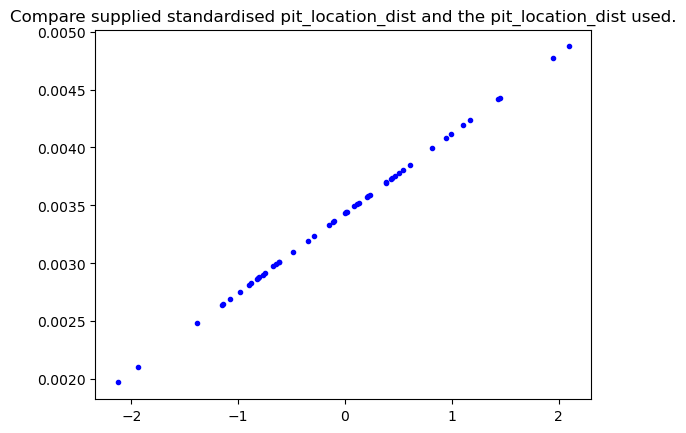

In [36]:
num_pits = dict_pit_parms["num_pits"]

s_pit_location_dist = np.random.normal(loc = 0, scale = 1, size = num_pits)


gms_pit.set_standardised_geometry_of_each_pit(pit_location_dist_standardised=s_pit_location_dist,
                           pit_angle_dist_standardised=None,
                           pit_radius_dist_standardised=None)

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

for ikey in dict_gms_original:
    print(ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))
    
plt.figure(1)
plt.title("Compare supplied standardised pit_location_dist and the pit_location_dist used.")
plt.plot(s_pit_location_dist,dict_gms2["pit_location_dist"],'b.')


Inducing Pitting Fault on Gear Tooth
angle_rad 0.0
gear_mesh_stiffness 759653.2642973474
pit_location_dist 0.006788280140472982
pit_angle_dist 0.3150379640481746
pit_radius_dist 0.0006391816144640109


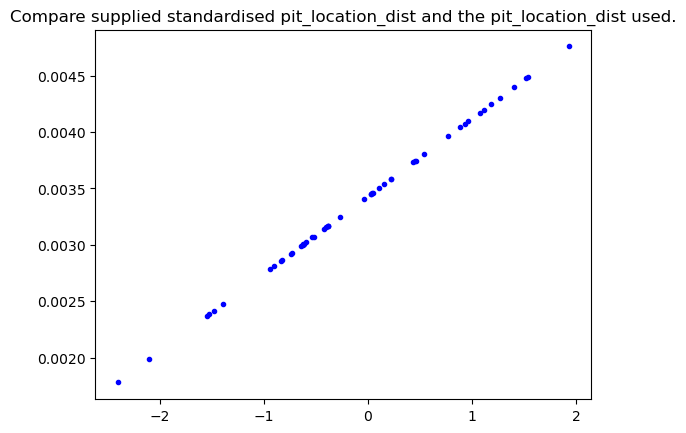

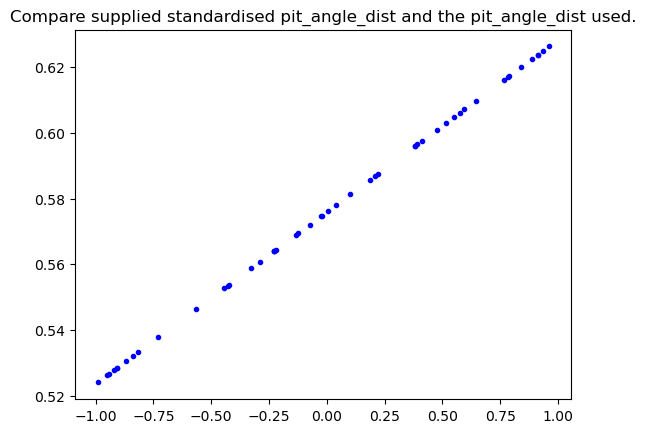

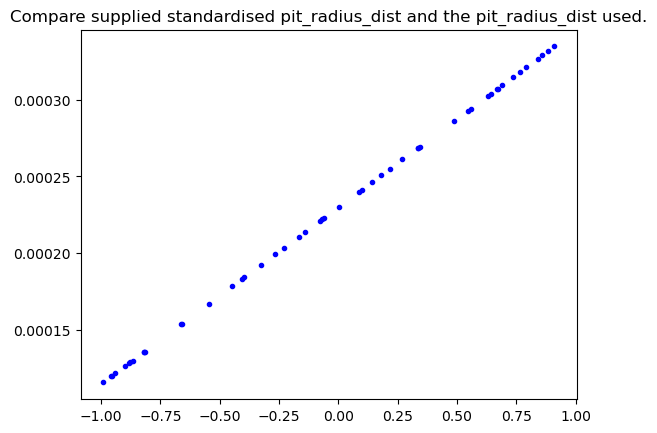

In [37]:
num_pits = dict_pit_parms["num_pits"]

s_pit_location_dist = np.random.normal(loc = 0, scale = 1, size = num_pits)

s_pit_angle_dist = np.random.uniform(low = -1, high = 1, size = num_pits)
         
s_pit_radius_dist = np.random.uniform(low = -1, high = 1, size = num_pits)

gms_pit.set_standardised_geometry_of_each_pit(pit_location_dist_standardised=s_pit_location_dist,
                           pit_angle_dist_standardised=s_pit_angle_dist,
                           pit_radius_dist_standardised=s_pit_radius_dist)

dict_gms2 = gms_pit.get_gear_mesh_stiffness()

for ikey in dict_gms_original:
    print(ikey,np.linalg.norm(dict_gms_original[ikey] - dict_gms2[ikey]))
    
plt.figure(1)
plt.title("Compare supplied standardised pit_location_dist and the pit_location_dist used.")
plt.plot(s_pit_location_dist,dict_gms2["pit_location_dist"],'b.')
plt.figure(2)
plt.title("Compare supplied standardised pit_angle_dist and the pit_angle_dist used.")
plt.plot(s_pit_angle_dist,dict_gms2["pit_angle_dist"],'b.')
plt.figure(3)
plt.title("Compare supplied standardised pit_radius_dist and the pit_radius_dist used.")
plt.plot(s_pit_radius_dist,dict_gms2["pit_radius_dist"],'b.')


## Newmark integration

Healthy Gear Tooth

Starting the integration process.
Calculating: #5000/50000, Time elapsed: 0.583 s, 0.010 min, Time left: 5.249 s, 0.087 min
Calculating: #10000/50000, Time elapsed: 1.159 s, 0.019 min, Time left: 4.636 s, 0.077 min
Calculating: #15000/50000, Time elapsed: 1.733 s, 0.029 min, Time left: 4.044 s, 0.067 min
Calculating: #20000/50000, Time elapsed: 2.312 s, 0.039 min, Time left: 3.468 s, 0.058 min
Calculating: #25000/50000, Time elapsed: 2.896 s, 0.048 min, Time left: 2.896 s, 0.048 min
Calculating: #30000/50000, Time elapsed: 3.477 s, 0.058 min, Time left: 2.318 s, 0.039 min
Calculating: #35000/50000, Time elapsed: 4.055 s, 0.068 min, Time left: 1.738 s, 0.029 min
Calculating: #40000/50000, Time elapsed: 4.632 s, 0.077 min, Time left: 1.158 s, 0.019 min
Calculating: #45000/50000, Time elapsed: 5.209 s, 0.087 min, Time left: 0.579 s, 0.010 min
Finished integration after: 5.798 sec, 0.097min



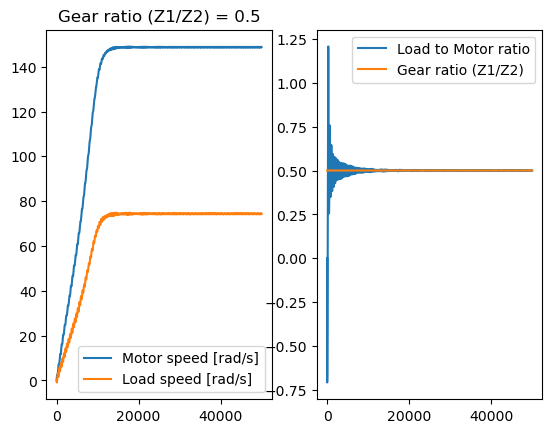

In [38]:
fs = 200000 # Hz
endtime = 2.0 #s - Defines where simulation ends. Should maybe change this to 1.5s
tnewmark = np.linspace(0,endtime,int(fs*endtime))
tnewmark = tnewmark[:50000]
loadCase2 = -20 * np.ones(len(tnewmark))

# The integrate function is available due to class inheritance:
output = gb_mod.integrate(
                    gms_h,
                    tnewmark, 
                    loadCase2,
                    motor_torque_function,
                    verbose=True
                    )

# This is the response:
plt.figure(1)
plt.subplot(1,2,1)
plt.plot(output["ud"][2,:], label = 'Motor speed [rad/s]')
plt.plot(output["ud"][7,:], label = 'Load speed [rad/s]')
# We can find the number of teeth from the parameter dictionary:
Z1 = gb_mod.get_parameters_dict()['Z1']
Z2 = gb_mod.get_parameters_dict()['Z2']
plt.title('Gear ratio (Z1/Z2) = {}'.format(Z1/Z2))
plt.legend()

plt.subplot(1,2,2)
plt.plot(output["ud"][7,:]/(output["ud"][2,:] + 0.0000001), label = 'Load to Motor ratio')
plt.plot(np.ones(len(output['ud'][2,:]))*(Z1/Z2), label = 'Gear ratio (Z1/Z2)')
plt.legend()

In [39]:
output

{'u': array([[ 0.00000000e+00, -1.04323405e-13, -4.32544730e-13, ...,
         -9.24921575e-07, -9.41121862e-07, -9.57520750e-07],
        [ 0.00000000e+00, -2.86626200e-13, -1.18840688e-12, ...,
         -2.54120114e-06, -2.58571106e-06, -2.63076664e-06],
        [ 0.00000000e+00,  1.76461807e-07,  3.33193954e-07, ...,
          3.28329493e+01,  3.28336932e+01,  3.28344371e+01],
        ...,
        [ 0.00000000e+00,  2.29365379e-13,  9.51049792e-13, ...,
          2.71660857e-06,  2.74968412e-06,  2.78303251e-06],
        [ 0.00000000e+00, -1.17249389e-10, -3.08057858e-10, ...,
          1.64163012e+01,  1.64166727e+01,  1.64170442e+01],
        [ 0.00000000e+00, -1.24922621e-07, -2.35895712e-07, ...,
          1.64160799e+01,  1.64164510e+01,  1.64168221e+01]]),
 'ud': array([[ 0.00000000e+00, -9.27316840e-09, -4.87518448e-08, ...,
         -3.22424689e-03, -3.26721416e-03, -3.30368828e-03],
        [ 0.00000000e+00, -2.54778208e-08, -1.33944593e-07, ...,
         -8.85854552e-03, -

In [44]:
for ikey in output:
    try:
        shape_of_key = np.size(output[ikey])
        if shape_of_key > 5:
            print(ikey,shape_of_key)
    except:
        pass

u 400000
ud 400000
udd 400000
gear_mesh_stiffness 50000
angle_of_pinion 50000
p 400000
parm_KEYS 45


## Example 1: Calculate the error between the target acceleration and the acceleration associated with specific parameters

In [40]:
# This is the target acceleration for subsequent optimisations:
TARGET_acc = output["udd"][2,:]

def cost_function(x_parm):

    gb_mod = gdsolve.GearboxModel_Chaari_8DOF()
    parmdict = gb_mod.get_parameter_dict_default()

    # We update the parameters like this:
    parmdict["kx1"] = x_parm[0]
    parmdict["ky1"] = x_parm[1]    

    gb_mod.set_parameter_dict(**parmdict)
    gms_h2 = gdsolve.GearStiffness_Healthy(gb_mod.parms)

    output = gb_mod.integrate(
                        gms_h2,
                        tnewmark, 
                        loadCase2,
                        motor_torque_function,
                        )   

    acc = output["udd"][2,:]
    return np.mean((acc - TARGET_acc)**2.0)

x_parm = []
x_parm.append([1E8,1E8])
x_parm.append([2E8,1E8])
x_parm.append([1E8,2E8])
x_parm.append([8.5364*10**7, 8.5364*10**7])

for x in x_parm:
    print("*"*20)
    print(x)
    print("ERROR. = {}".format(cost_function(x)))

********************
[100000000.0, 100000000.0]
Healthy Gear Tooth

Starting the integration process.
Calculating: #5000/50000, Time elapsed: 0.586 s, 0.010 min, Time left: 5.277 s, 0.088 min
Calculating: #10000/50000, Time elapsed: 1.160 s, 0.019 min, Time left: 4.641 s, 0.077 min
Calculating: #15000/50000, Time elapsed: 1.724 s, 0.029 min, Time left: 4.023 s, 0.067 min
Calculating: #20000/50000, Time elapsed: 2.294 s, 0.038 min, Time left: 3.441 s, 0.057 min
Calculating: #25000/50000, Time elapsed: 2.859 s, 0.048 min, Time left: 2.859 s, 0.048 min
Calculating: #30000/50000, Time elapsed: 3.429 s, 0.057 min, Time left: 2.286 s, 0.038 min
Calculating: #35000/50000, Time elapsed: 3.998 s, 0.067 min, Time left: 1.713 s, 0.029 min
Calculating: #40000/50000, Time elapsed: 4.578 s, 0.076 min, Time left: 1.145 s, 0.019 min
Calculating: #45000/50000, Time elapsed: 5.143 s, 0.086 min, Time left: 0.571 s, 0.010 min
Finished integration after: 5.711 sec, 0.095min

ERROR. = 121768.64552566521
***

## Example 2: Same example as 1, the method how the parameters are changed is different

In [41]:
# This is the target acceleration for subsequent optimisations:
TARGET_acc = output["udd"][2,:]

def cost_function(x_parm):

    gb_mod = gdsolve.GearboxModel_Chaari_8DOF()
    parmdict = gb_mod.get_parameter_dict_default()
    gb_mod.set_parameter_dict(**parmdict)
    
    # We can also update the parameters like this:
    gb_mod.set_parameter_dict(kx1 = x_parm[0],ky1 = x_parm[1])
    gms_h2 = gdsolve.GearStiffness_Healthy(gb_mod.parms)

    output = gb_mod.integrate(
                        gms_h2,
                        tnewmark, 
                        loadCase2,
                        motor_torque_function,
                        )   

    acc = output["udd"][2,:]
    return np.mean((acc - TARGET_acc)**2.0)

x_parm = []
x_parm.append([1E8,1E8])
x_parm.append([2E8,1E8])
x_parm.append([1E8,2E8])
x_parm.append([8.5364*10**7, 8.5364*10**7])

for x in x_parm:
    print("*"*20)
    print(x)
    print("ERROR. = {}".format(cost_function(x)))

********************
[100000000.0, 100000000.0]
Healthy Gear Tooth

Starting the integration process.
Calculating: #5000/50000, Time elapsed: 0.572 s, 0.010 min, Time left: 5.144 s, 0.086 min
Calculating: #10000/50000, Time elapsed: 1.140 s, 0.019 min, Time left: 4.562 s, 0.076 min
Calculating: #15000/50000, Time elapsed: 1.717 s, 0.029 min, Time left: 4.007 s, 0.067 min
Calculating: #20000/50000, Time elapsed: 2.291 s, 0.038 min, Time left: 3.437 s, 0.057 min
Calculating: #25000/50000, Time elapsed: 2.862 s, 0.048 min, Time left: 2.862 s, 0.048 min
Calculating: #30000/50000, Time elapsed: 3.436 s, 0.057 min, Time left: 2.291 s, 0.038 min
Calculating: #35000/50000, Time elapsed: 4.010 s, 0.067 min, Time left: 1.719 s, 0.029 min
Calculating: #40000/50000, Time elapsed: 4.577 s, 0.076 min, Time left: 1.144 s, 0.019 min
Calculating: #45000/50000, Time elapsed: 5.147 s, 0.086 min, Time left: 0.572 s, 0.010 min
Finished integration after: 5.722 sec, 0.095min

ERROR. = 121768.64552566521
***

## Example 3: Calculate the error between two different models

In [42]:
# This is the target acceleration for subsequent optimisations:
TARGET_acc = output["udd"][2,:]

def cost_function(x_parm):

    gb_mod = gdsolve.GearboxModel_Luo_10DOF()
    parmdict = gb_mod.get_parameter_dict_default()
    gb_mod.set_parameter_dict(**parmdict)
    
    # We can also update the parameters like this:
    gb_mod.set_parameter_dict(kx1 = x_parm[0],ky1 = x_parm[1])
    gms_h2 = gdsolve.GearStiffness_Healthy(gb_mod.parms)

    output = gb_mod.integrate(
                        gms_h2,
                        tnewmark, 
                        loadCase2,
                        motor_torque_function,
                        )   

    acc = output["udd"][2,:]
    return np.mean((acc - TARGET_acc)**2.0)

x_parm = []
x_parm.append([1E8,1E8])
x_parm.append([2E8,1E8])
x_parm.append([1E8,2E8])
x_parm.append([8.5364*10**7, 8.5364*10**7])

for x in x_parm:
    print("*"*20)
    print(x)
    print("ERROR. = {}".format(cost_function(x)))

********************
[100000000.0, 100000000.0]
Healthy Gear Tooth

Starting the integration process.
Calculating: #5000/50000, Time elapsed: 0.575 s, 0.010 min, Time left: 5.178 s, 0.086 min
Calculating: #10000/50000, Time elapsed: 1.140 s, 0.019 min, Time left: 4.562 s, 0.076 min
Calculating: #15000/50000, Time elapsed: 1.709 s, 0.028 min, Time left: 3.988 s, 0.066 min
Calculating: #20000/50000, Time elapsed: 2.281 s, 0.038 min, Time left: 3.422 s, 0.057 min
Calculating: #25000/50000, Time elapsed: 2.857 s, 0.048 min, Time left: 2.857 s, 0.048 min
Calculating: #30000/50000, Time elapsed: 3.421 s, 0.057 min, Time left: 2.280 s, 0.038 min
Calculating: #35000/50000, Time elapsed: 4.000 s, 0.067 min, Time left: 1.714 s, 0.029 min
Calculating: #40000/50000, Time elapsed: 4.571 s, 0.076 min, Time left: 1.143 s, 0.019 min
Calculating: #45000/50000, Time elapsed: 5.140 s, 0.086 min, Time left: 0.571 s, 0.010 min
Finished integration after: 5.708 sec, 0.095min

ERROR. = 2105779.310882623
****